# W3 school ML basic example
From [W3 website](https://www.w3schools.com/python/python_ml_getting_started.asp)

## Imports

In [133]:
import numpy
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import pandas
from sklearn import linear_model
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.image as pltimg
%matplotlib notebook

## Data

In [134]:
speed = [99,86,87,88,111,86,103,87,94,78,77,85,86]
ages = [5,31,43,48,50,41,7,11,15,39,80,82,32,2,8,6,25,36,27,61,3]
uni = numpy.random.uniform(0.0, 5.0, 100000)
normal = numpy.random.normal(5.0, 1.0, 100000)
x1 = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y1 = [99,86,87,88,111,86,103,87,94,78,77,85,86]
x2 = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y2 = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

In [135]:
df1 = pandas.read_csv("cars.csv") 

In [136]:
df2 = pandas.read_csv("shows.csv")
d = {'UK': 0, 'USA': 1, 'N': 2}
df2['Nationality'] = df2['Nationality'].map(d)
d = {'YES': 1, 'NO': 0}
df2['Go'] = df2['Go'].map(d)

## Decision tree

In [137]:
df2.head(5)

,Age,Experience,Rank,Nationality,Go
0,36,10,9,0,0
1,42,12,4,1,0
2,23,4,6,2,0
3,52,4,4,1,0
4,43,21,8,1,1


In [138]:
features = ['Age', 'Experience', 'Rank', 'Nationality']

X = df2[features]
y = df2['Go']

In [139]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

True

<IPython.core.display.Javascript object>


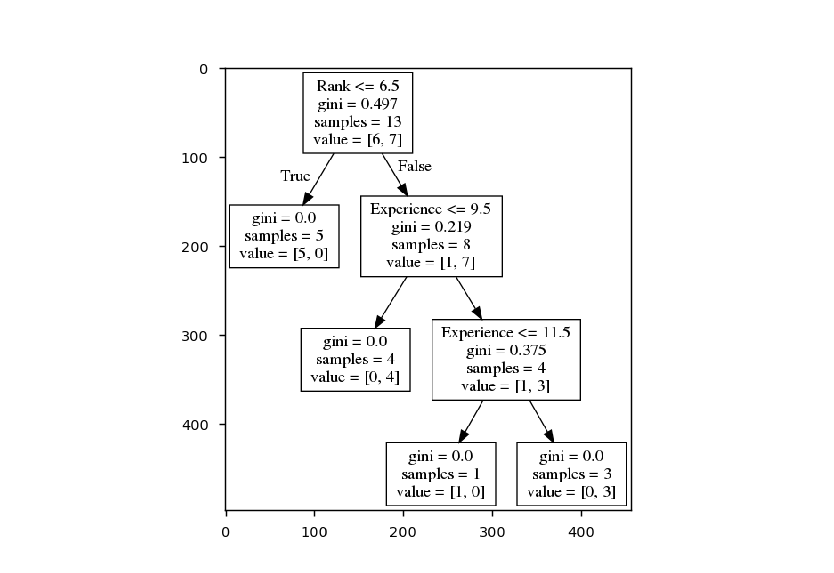

In [140]:
img=pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show() 

In [142]:
print(dtree.predict([[40, 10, 6, 1]])) 

[0]


## Multiple regression

In [80]:
X = df[['Weight', 'Volume']]
Y = df['CO2']

In [95]:
regr = linear_model.LinearRegression()
regr.fit(X, y)
predictedCO2 = regr.predict([[2300, 1300]])
print(regr.coef_) 
print(predictedCO2) 

ValueError: Found input variables with inconsistent numbers of samples: [36, 100]

## Train n Test

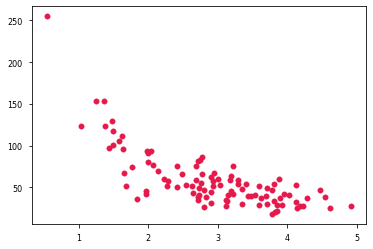

In [82]:
x = numpy.random.normal(3, 1, 100)
y = numpy.random.normal(150, 40, 100) / x

plt.scatter(x, y)
plt.show() 

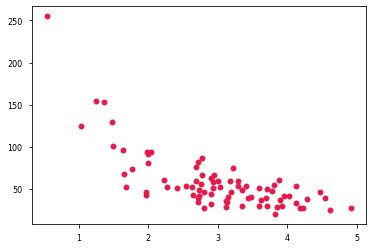

In [84]:
train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:] 

plt.scatter(train_x, train_y)
plt.show() 

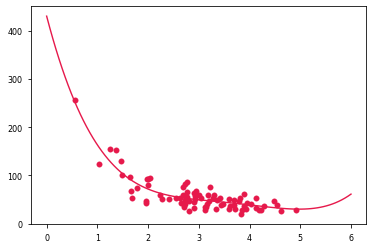

0.80162814927


In [86]:
mymodel = numpy.poly1d(numpy.polyfit(train_x, train_y, 4))

myline = numpy.linspace(0, 6, 100)

plt.scatter(train_x, train_y)
plt.plot(myline, mymodel(myline))
plt.show() 
r2 = r2_score(train_y, mymodel(train_x))

print(r2) 

In [87]:
r2 = r2_score(test_y, mymodel(test_x))

print(r2) 

0.731652574928


## Stat

In [25]:
x = numpy.mean(speed)
#print(x) 

In [26]:
x = numpy.median(speed)
#print(x) 

In [27]:
x = stats.mode(speed)
#print(x) 

In [28]:
x = numpy.std(speed)
#print(x) 

In [29]:
x = numpy.percentile(ages, 75)
print(x) 

43.0


## Plot

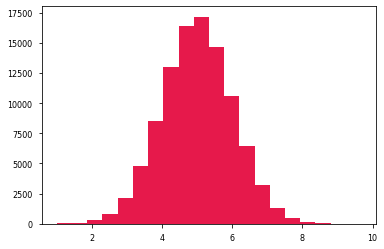

In [32]:
plt.hist(normal, 20)
plt.show() 

## Lin regression

In [48]:
slope, intercept, r, p, std_err = stats.linregress(x1, y1)
print(r)

-0.758591524376


In [49]:
def myfunc(x):
  return slope * x + intercept

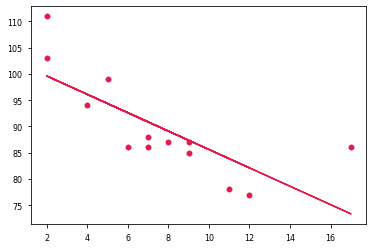

In [50]:
mymodel = list(map(myfunc, x))
plt.scatter(x1, y1)
plt.plot(x, mymodel)
plt.show() 

0.881676658779


81.165133144228918

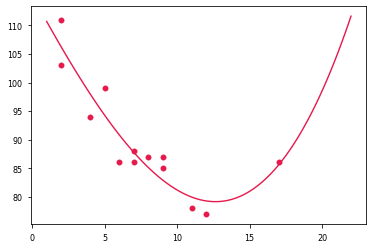

In [62]:
mymodel = numpy.poly1d(numpy.polyfit(x, y, 3)) 
myline = numpy.linspace(1, 22, 100)
plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
print(r2_score(y, mymodel(x))) 
mymodel(10)